In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv('data/Clg_placement.txt')

In [3]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [4]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

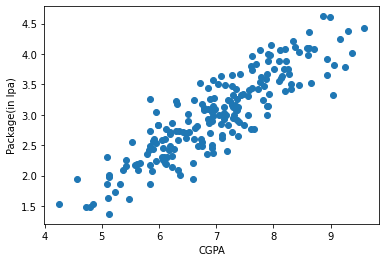

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.predict(X_train)

array([3.08766517, 4.0863992 , 2.12798777, 1.94944314, 3.43917491,
       2.87564342, 2.94817717, 2.83100726, 3.51728819, 3.50612915,
       3.96364977, 3.53960627, 2.79195062, 2.59666743, 2.74731446,
       2.68593975, 1.95502266, 2.5018156 , 2.97049525, 3.03186997,
       2.4181228 , 2.47949752, 2.35674808, 2.42370232, 4.29842095,
       2.21726009, 3.50054963, 2.52413367, 3.43359539, 1.80995515,
       2.55761079, 3.90227505, 2.49065656, 3.10998325, 1.96060218,
       3.22715316, 3.70699186, 3.72373042, 3.08208565, 3.20483508,
       2.26189625, 2.4460204 , 3.57308338, 3.08766517, 2.64130359,
       2.94817717, 2.12798777, 2.71383735, 3.39453875, 3.23273268,
       3.16577844, 2.42370232, 3.22157364, 2.97049525, 4.11987632,
       3.2104146 , 3.05418805, 2.10566969, 3.322005  , 3.6902533 ,
       2.3623276 , 2.88680246, 3.11556277, 3.16577844, 2.89238198,
       2.51855416, 2.9258591 , 3.67909426, 2.92027958, 3.21599412,
       2.57434935, 2.79195062, 2.0219769 , 3.12672181, 2.92585

InvalidIndexError: (slice(None, None, None), None)

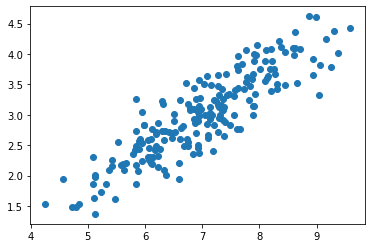

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_test),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred),"LPA")

MAE 0.2884710931878175 LPA


In [23]:
print("MSE",mean_squared_error(y_test,y_pred),"Not LPA")

MSE 0.12129235313495527 Not LPA


In [24]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)),"LPA")

RMSE 0.34827051717731616 LPA


In [25]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [26]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [27]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [28]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.573303,3.26
1,5.12,0.534129,1.98
2,7.82,0.978555,3.25
3,7.42,0.457850,3.67
4,6.94,0.772258,3.57


Text(0, 0.5, 'Package(in lpa)')

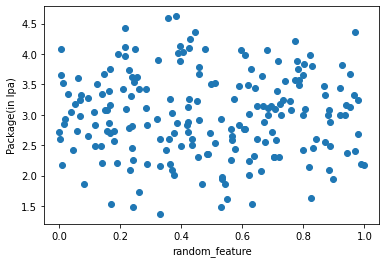

In [29]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [30]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7794853370599681


In [35]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7675656255496961

In [36]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [37]:
new_df2.sample(5)

,cgpa,iq,package
16,6.84,3.05,2.35
15,7.25,3.53,3.23
101,6.71,3.32,3.52
116,9.04,3.83,3.33
37,5.90,3.13,2.43


Text(0, 0.5, 'Package(in lpa)')

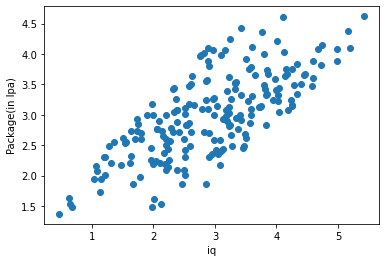

In [38]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [39]:
np.random.randint(-100,100)

-65

In [40]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8570878363340032


In [43]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8493628545142196